# HW7: Neural Net Performance on Phoneme Data for Speech Recognition 

Blanca Miller <br />
STAT 760 <br />
04.05.2018 <br />

__Objective:__ The aim of neural networks is to extract linear combinations of inputs as derived features to generate a nonlinear model of the data that makes predictions for new data sets [1]. A neural net takes a set of inputs, weights them, and runs them through a series of hi dden layers. These hidden layers are composed of primitive function nodes; nodes add together the weighted inputs it retrieves and applies the primitive function, an activation function that is usually the sigmoid activation function [2]. After traversing the network of hidden layers, the inputs are transformed into a set of outputs to make predictions about new data [1]. For this assignment, a data set of 5 phoneme classifications from continuous data of 50 male speakers were used.

Sigmoid Function: sigmoid σ(v) = 1/(1 + e^(−v))

__Data Set__
- 4509 speech frames 
- Each speech frame has a 32ms duration
- ~2 examples for each phoneme from each speaker were chosen
- Each speech frame is represented by 512 samples at 16kHz sampling rate
- 5 phonemes of 4509 speech frames, frequencies & sounds:
        - aa: 695 as in "dark" vowel,
        - ao: 1022 as the first vowel in "water", 
        - dcl: 757 as in "dark",
        - iy: 1163 as in "she" vowel, & 
        - sh: 872 as in "she"
        
- x.1 - x.256: 256 data columns 
- g: response column
- speaker: speaker identification

__References__
1. Trevor Hastie, Robert Tibshirani, Jerome Friedman, Elements of Statistical Learning: Data mining, inference, and prediction, 2002. Retrieved from: http://web.stanford.edu/~hastie/ElemStatLearn/main.html
2. Raul Rojas, Neural Networks: A systematic introduction, 1996. Retrieved from: http://page.mi.fu-berlin.de/rojas/neural/neuron.pdf

__Phoneme Data Set:__ http://web.stanford.edu/~hastie/ElemStatLearn/

### Import Libraries

In [135]:
import sklearn 
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn import decomposition
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

### Function: Confusion Matrix

In [136]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Load Phoneme Digits Data Set Into a DataFrame

In [137]:
data = pd.read_csv('five_phonemes.txt', sep=',')

In [138]:
data.shape

(4509, 259)

In [5]:
print(data[0:10])

   row.names       x.1       x.2       x.3       x.4       x.5       x.6  \
0          1   9.85770   9.20711   9.81689   9.01692   9.05675   8.92518   
1          2  13.23079  14.19189  15.34428  18.11737  19.53875  18.32726   
2          3  10.81889   9.07615   9.77940  12.20135  12.59005  10.53364   
3          4  10.53679   9.12147  10.84621  13.92331  13.52476  10.27831   
4          5  12.96705  13.69454  14.91182  18.22292  18.45390  17.25760   
5          6  11.66525  12.43949  14.74297  18.83307  18.55868  14.86749   
6          7  10.95324  11.20585  16.17634  18.59300  17.50922  10.27798   
7          8  15.58114  15.53505  13.83707  13.89967  14.59198  14.05211   
8          9   9.37324  11.29505  17.15139  18.03336  14.95980  14.97031   
9         10   9.48477  11.38758  16.74884  17.36141  14.67661  15.02621   

        x.7       x.8       x.9         ...              x.249     x.250  \
0  11.28308  11.52980  10.79713         ...           12.68076  11.20767   
1  17.34169

### Convert Data Frame Into Numpy Array

In [6]:
data_set = data.as_matrix()

### Parse Data Set & Convert to Numpy Array

In [7]:
# Parse data values: get columns 1-(last-1) for all rows
X_phonemes = data_set[1:4509, 1:257]

# Parse labels: get last column for all rows 
y_phonemes = data_set[1:4509, 258]

In [8]:
print("Data: {}".format(X_phonemes.shape))
print("Labels: {}".format(y_phonemes.shape))

Data: (4508, 256)
Labels: (4508,)


### Generate Test & Training Set

In [9]:
# Allocate 2/3 of the data set as training & 1/3 as testing
X_train, X_test, y_train, y_test = train_test_split(X_phonemes, y_phonemes, test_size=0.33)

In [10]:
# print data & label set dimensionality for verification
print("Phoneme Training Data: {}".format(X_train.shape))
print("Phoneme Training Labels: {}".format(y_train.shape))
print("Phoneme Testing Data: {}".format(X_test.shape))
print("Phoneme Testing Labels: {}".format(y_test.shape))

Phoneme Training Data: (3020, 256)
Phoneme Training Labels: (3020,)
Phoneme Testing Data: (1488, 256)
Phoneme Testing Labels: (1488,)


In [17]:
print(X_train[0:4])

[[-1.84300461 -2.68100039 -1.37901427 ...  0.20264115 -0.25700744
  -1.33484476]
 [ 0.1705111   0.70496065  1.37922303 ... -1.47895246 -0.91342714
  -1.24744436]
 [-0.33822047 -0.70714626 -1.01392977 ... -1.71348871 -1.2761064
  -1.76123742]
 [-0.12752105 -0.15030014  0.84119621 ... -1.19684203 -0.99390218
  -1.09568563]]


In [18]:
print(X_test[0:4])

[[-0.28900463 -0.73862764  1.16465739 ... -0.79310545 -0.71131039
  -0.72155436]
 [ 0.26122302  0.35292546  1.24892576 ... -0.62643711 -0.48921821
  -0.74737648]
 [-0.47468306 -0.93181735 -0.29245916 ... -1.20583454 -1.77858002
  -2.30432073]
 [-0.4768633  -1.1302985  -0.06586689 ...  0.1027536  -0.11118119
  -1.4589433 ]]


### Standardize Data to Obtain Similar Inputs & Weight Magnitudes

In [19]:
# set axis to 1 to standardize by sample/vector, rather than by feature 
X_train = preprocessing.scale(X_train, axis=1)
X_test = preprocessing.scale(X_test, axis=1)

### Principal Componenet Analysis: 
Identify the main uncorrelated variables to re-express noisy data in a simplified way

In [116]:
k60 = 8
k70 = 23
k100 = 256

pca60 = decomposition.PCA(n_components = k60)
pca70 = decomposition.PCA(n_components = k70)
pca100 = decomposition.PCA(n_components = k100)

pca60.fit(X_train)
pca70.fit(X_train)
pca100.fit(X_train)

X_train_trans60 = pca60.transform(X_train)
X_train_trans70 = pca70.transform(X_train)
X_train_trans100 = pca100.transform(X_train)

X_test_trans60 = pca60.transform(X_test)
X_test_trans70 = pca70.transform(X_test)
X_test_trans100 = pca100.transform(X_test)

In [117]:
pca60.explained_variance_ratio_.sum()

0.5995221931169317

In [118]:
pca70.explained_variance_ratio_.sum()

0.6981980195200477

In [119]:
pca100.explained_variance_ratio_.sum()

1.0

Text(0.5,1,u'PCA for feature reduction')

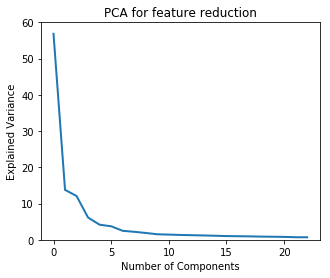

In [120]:
plt.figure(1, figsize=(5,4))      # create a figure instance
plt.clf()                         # clear the current figure
plt.axes                          # set the coordinate system
plt.plot(pca70.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.ylim(0,60)
plt.title('PCA for feature reduction')

__Analysis:__ The cumulative variance for 8 principal components is ~60% and ~70% for 23 principal components. It is generally recommended to only remove ~30% of the information contained in the original components, however in this case it may be preferred to remove more of the information as the cost of obtaining more accuracy means trippling the number of features.

### Train a Neural Net: Use MLP to Train Using Backpropagation

In [ ]:
# initialize classifier objects
clf_10 = MLPClassifier(hidden_layer_sizes=(10,))
clf_100 = MLPClassifier()
clf_199 = MLPClassifier(hidden_layer_sizes=(199,))

In [ ]:
# fit the classifier model to the data matrix X and its targets y
clf_10.fit(X_train_trans60, y_train)
clf_100.fit(X_train_trans60, y_train)
clf_199.fit(X_train_trans60, y_train)

### Determine the Neural Nets Predictive Score

In [ ]:
print("1 HIDDEN LAYER & 10 NODES")
print("Training set score: %f" % clf_10.score(X_train_trans60, y_train))
print("Test set score: %f \n" % clf_10.score(X_test_trans60, y_test))

print("1 HIDDEN LAYER & 100 NODES")
print("Training set score: %f" % clf_100.score(X_train_trans60, y_train))
print("Test set score: %f \n" % clf_100.score(X_test_trans60, y_test))

print("1 HIDDEN LAYER & 199 NODES")
print("Training set score: %f" % clf_199.score(X_train_trans60, y_train))
print("Test set score: %f" % clf_199.score(X_test_trans60, y_test))

### Predict Labels for New Data

In [139]:
test_predictions_10 = clf_10.predict(X_test_trans60)
test_predictions_100 = clf_100.predict(X_test_trans60)
test_predictions_199 = clf_199.predict(X_test_trans60)

In [140]:
cm_10 = confusion_matrix(y_test, test_predictions_10)
cm_100 = confusion_matrix(y_test, test_predictions_100)
cm_199 = confusion_matrix(y_test, test_predictions_199)

### Generate a Confustion Matrix

In [ ]:
class_names = [0,1,2,3,4]
plot_confusion_matrix(cm_10, classes=class_names, title='Confusion Matrix')